# Cube W43-MM1 12m en N2H+

In [1]:
%pylab inline
from pywavan import fbm2d, powspec, fan_trans
from astropy.io import fits
import aplpy
from pywavan import nb_scale

Populating the interactive namespace from numpy and matplotlib


In [2]:
HDU = fits.open("/user/workdir/soldanof/ALMA/W43-MM1_B3_spw0_12M_n2hp.image_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [4]:
header['NAXIS3']

145

In [7]:
reso = header ['CDELT2']*60
M = nb_scale(cube.shape)
N = header['NAXIS3']

In [ ]:
coherent_tot = []
gaussian_tot = []
s1a_tot_tot = []
s1a_tot_gau = []
s1a_tot_ng = []

for i in range(N) :
    q = []
    q= [2.0]*nb_scale(cube.shape)
    print("data number",i)
    wt, S11a, wave_k, S1a, q =  fan_trans(cube[i,:,:], reso=reso, angular=False,q=q,apodize = 0.98,arrdim = np.array([1024,1600]))

    coherent = np.sum(wt[M:2*M,:,:],axis=0)
    Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 
    
    coherent_tot.append( coherent )
    gaussian_tot.append( Gaussian )
    s1a_tot_tot.append( S1a[0,:] )
    s1a_tot_ng.append(S1a[1,:])
    s1a_tot_gau.append(S1a[2,:])

np.save("/user/workdir/soldanof/data/coh.npy", coherent_tot)
np.save("/user/workdir/soldanof/data/gau.npy", gaussian_tot)
np.save("/user/workdir/soldanof/data/s1at.npy",s1a_tot_tot)
np.save("/user/workdir/soldanof/data/s1ag.npy",s1a_tot_gau)
np.save("/user/workdir/soldanof/data/s1ang.npy",s1a_tot_ng)
np.save("/user/workdir/soldanof/data/wave_k.npy",wave_k)

  0%|          | 0/25 [00:00<?, ?it/s]

data number 0
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 1
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 2
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 3
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 4
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 5
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 6
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 7
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 8
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 9
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 10
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 11
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 12
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 13
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 14
1600 1024


  0%|          | 0/25 [00:00<?, ?it/s]

data number 15
1600 1024


 32%|███▏      | 8/25 [00:41<01:49,  6.44s/it]

Text(0.5, 1.0, 'Gaussin 2')

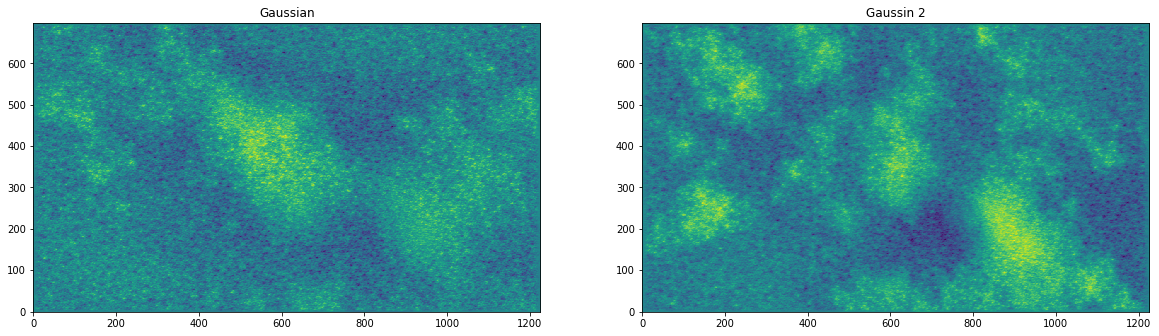

In [13]:
figure(figsize=(20,10))
subplot(1,2,1)
imshow(gaussian_tot[0].real,origin="lower")
title('Gaussian')
subplot(1,2,2)
imshow(gaussian_tot[1].real,origin="lower")
title('Gaussin 2') 

Text(0.5, 1.0, 'Coherent')

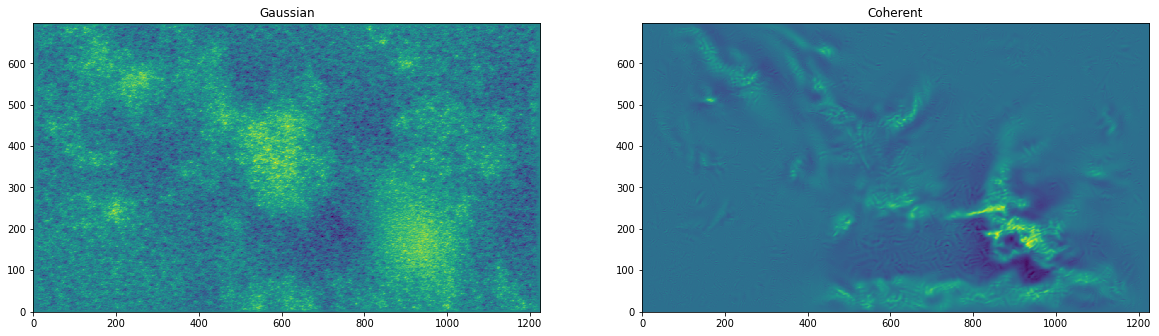

In [54]:
figure(figsize=(20,10))
im_g = np.load("/user/workdir/soldanof/data/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/coh.npy")

subplot(1,2,1)
imshow(im_g[60].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[60].real,origin="lower")
title('Coherent')

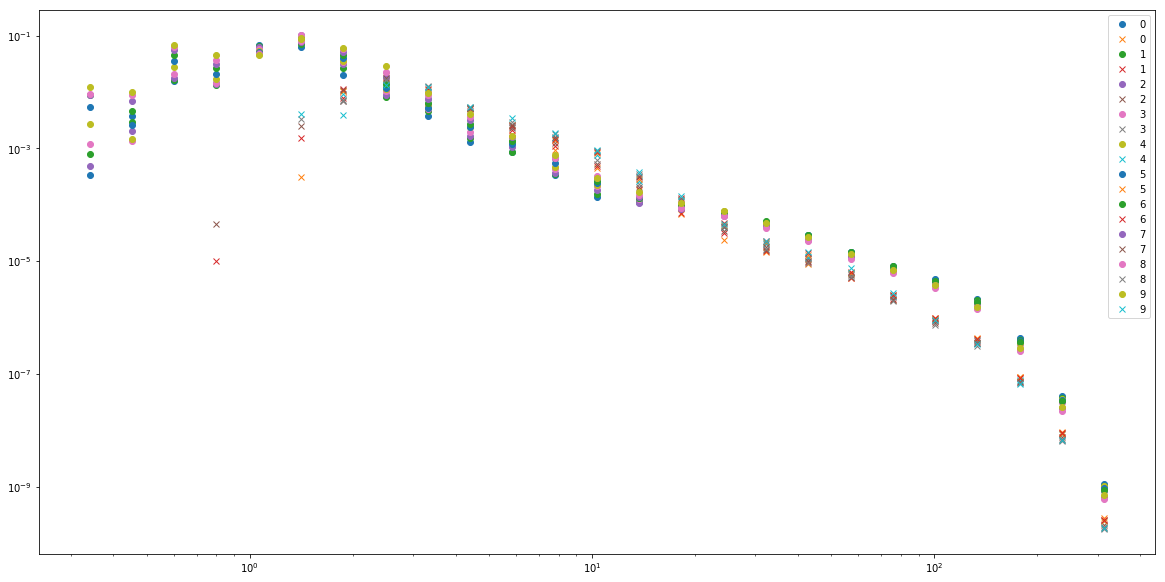

In [48]:
figure(figsize=(20,10))
t = np.load("/user/workdir/soldanof/data/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/s1ang.npy")
for i in range(10) : 
    plt.plot(wave_k, t[i],"o",label="{}".format(i))
    plt.plot(wave_k, ng[i],"x",label="{}".format(i))
plt.xscale("log")
plt.yscale("log")
plt.legend()

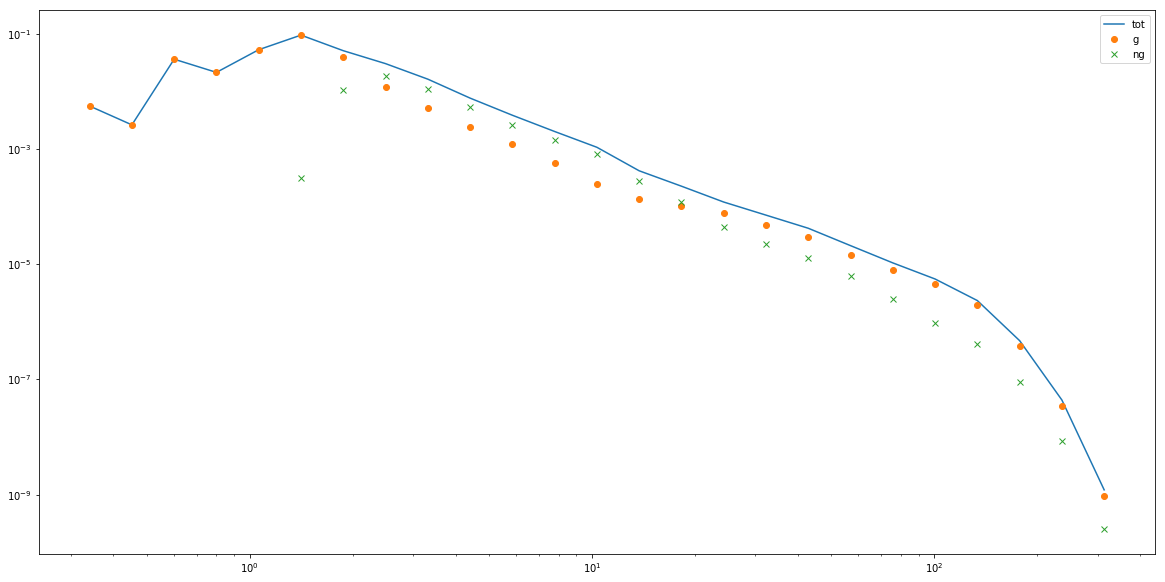

In [56]:
figure(figsize=(20,10))
t = np.load("/user/workdir/soldanof/data/s1at.npy")
g = np.load("/user/workdir/soldanof/data/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/s1ang.npy")
wk = np.load("/user/workdir/soldanof/data/wave_k.npy")
plt.plot(wave_k, t[60],label="tot")
plt.plot(wave_k, g[60],"o",label="g")
plt.plot(wave_k, ng[60],"x",label="ng")
plt.xscale("log")
plt.yscale("log")
plt.legend()

***
# Spectre de fourier de l'image

In [ ]:
spec_k_tot = []

for i in range(N) :
    tab_k, spec_k = powspec(cube[i,:,:], reso=reso)
    spec_k_tot.append(spec_k)
    #print(i)

np.save("/user/workdir/soldanof/data/spec_k.npy",spec_k_tot)
np.save("/user/workdir/soldanof/data/tab_k.npy",tab_k)

In [8]:
q = []
q= [2.0]*nb_scale(cube.shape)

wt, S11a, wave_k, S1a, q =  fan_trans(cube[60,:,:], reso=reso, angular=False,q=q,apodize = 0.98,arrdim = np.array([1024,1600]))
coherent = np.sum(wt[M:2*M,:,:],axis=0)
Gaussian = np.sum(wt[2*M:3*M,:,:],axis=0) 

  0%|          | 0/25 [00:00<?, ?it/s]

1600 1024


100%|██████████| 25/25 [03:02<00:00,  7.32s/it]


Text(0.5, 1.0, 'Coherent')

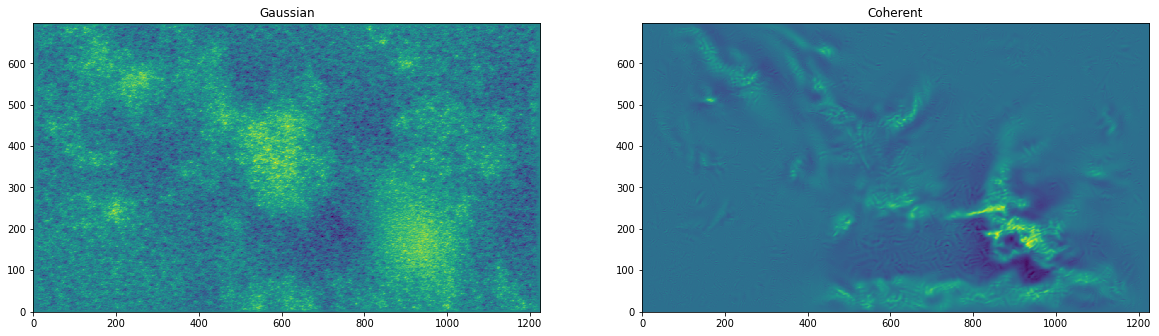

In [9]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(Gaussian.real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(coherent.real,origin="lower")
title('Coherent')

In [9]:
M

25

Text(0.5, 1.0, 'Coherent 14')

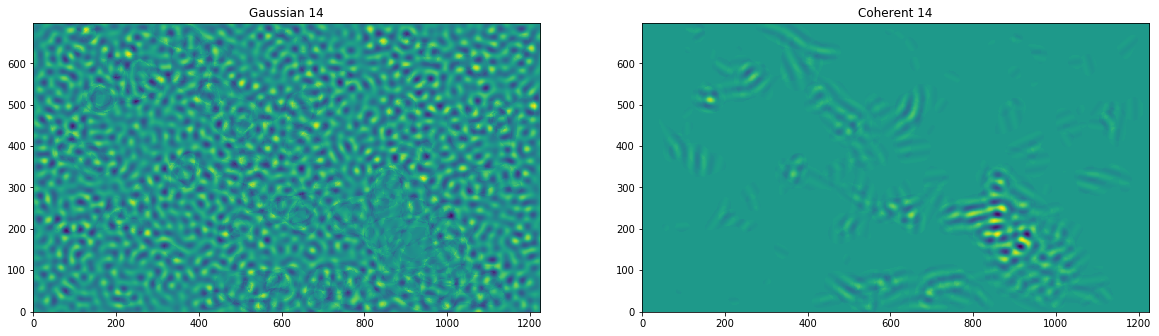

In [25]:
figure(figsize=(20,10))
i = 14
subplot(1,2,1)
imshow(wt[2*M+i,:,:].real,origin="lower")
title('Gaussian {}'.format(i))

subplot(1,2,2)
imshow(wt[M+i,:,:].real,origin="lower")
title('Coherent {}'.format(i))

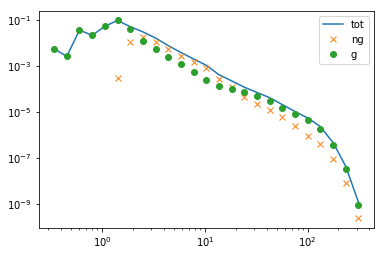

In [10]:
plt.plot(wave_k, S1a[0,:],label="tot")
plt.plot(wave_k, S1a[1,:],"x",label="ng")
plt.plot(wave_k, S1a[2,:],"o",label="g")
plt.xscale("log")
plt.yscale("log")
plt.legend()